In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
try:
    X_train = pd.read_csv('X_train.csv')
    X_test = pd.read_csv('X_test.csv')
    y_train = pd.read_csv('y_train.csv').values.ravel() # .ravel() fixes the "column-vector" warning
    y_test = pd.read_csv('y_test.csv').values.ravel()
except FileNotFoundError:
    print('Error in loading the files')
    exit()

In [3]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [4]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [5]:
# cv=3 means we check every setting 3 times to be sure
print("Starting XGBoost Hyperparameter Tuning...")
print("This will test 18 combinations (3x2x3). Please wait...")
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

Starting XGBoost Hyperparameter Tuning...
This will test 18 combinations (3x2x3). Please wait...


In [6]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\dhair\miniconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:51:21] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [7]:
best_model = grid_search.best_estimator_
print(f"Best Parameters Found: {grid_search.best_params_}")

Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [8]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized XGBoost Accuracy: {accuracy * 100:.2f}%")

Optimized XGBoost Accuracy: 73.32%


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6863
           1       0.76      0.68      0.72      6866

    accuracy                           0.73     13729
   macro avg       0.74      0.73      0.73     13729
weighted avg       0.74      0.73      0.73     13729



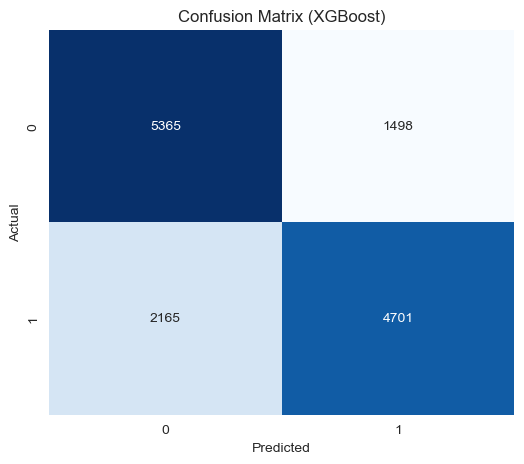

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')

In [11]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)